In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [3]:
df=pd.read_csv('../data/cardekho_dataset.csv')
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [5]:
df['seats'].unique()

array([5, 8, 7, 6, 4, 2, 9, 0])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [7]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [10]:
df['car_name'].value_counts()

car_name
Hyundai i20           898
Maruti Swift Dzire    875
Maruti Swift          774
Maruti Alto           768
Honda City            750
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: count, Length: 121, dtype: int64

<Axes: ylabel='count'>

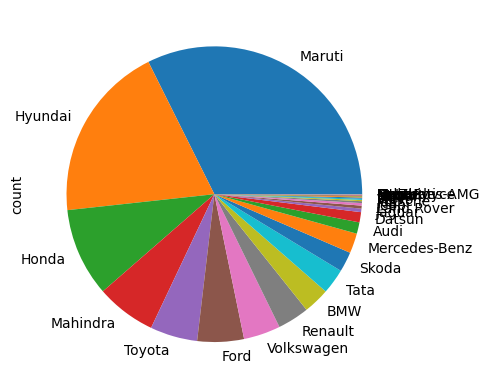

In [11]:
df['brand'].value_counts().plot(kind='pie')

In [12]:
df['seller_type'].value_counts()

seller_type
Dealer              9459
Individual          5612
Trustmark Dealer     173
Name: count, dtype: int64

In [13]:
num_column=df.select_dtypes(exclude='object').columns
str_column=df.select_dtypes(include='object').columns


In [14]:
num_column

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

In [15]:
str_column

Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')

In [16]:
df['transmission_type'].value_counts()

transmission_type
Manual       12094
Automatic     3150
Name: count, dtype: int64

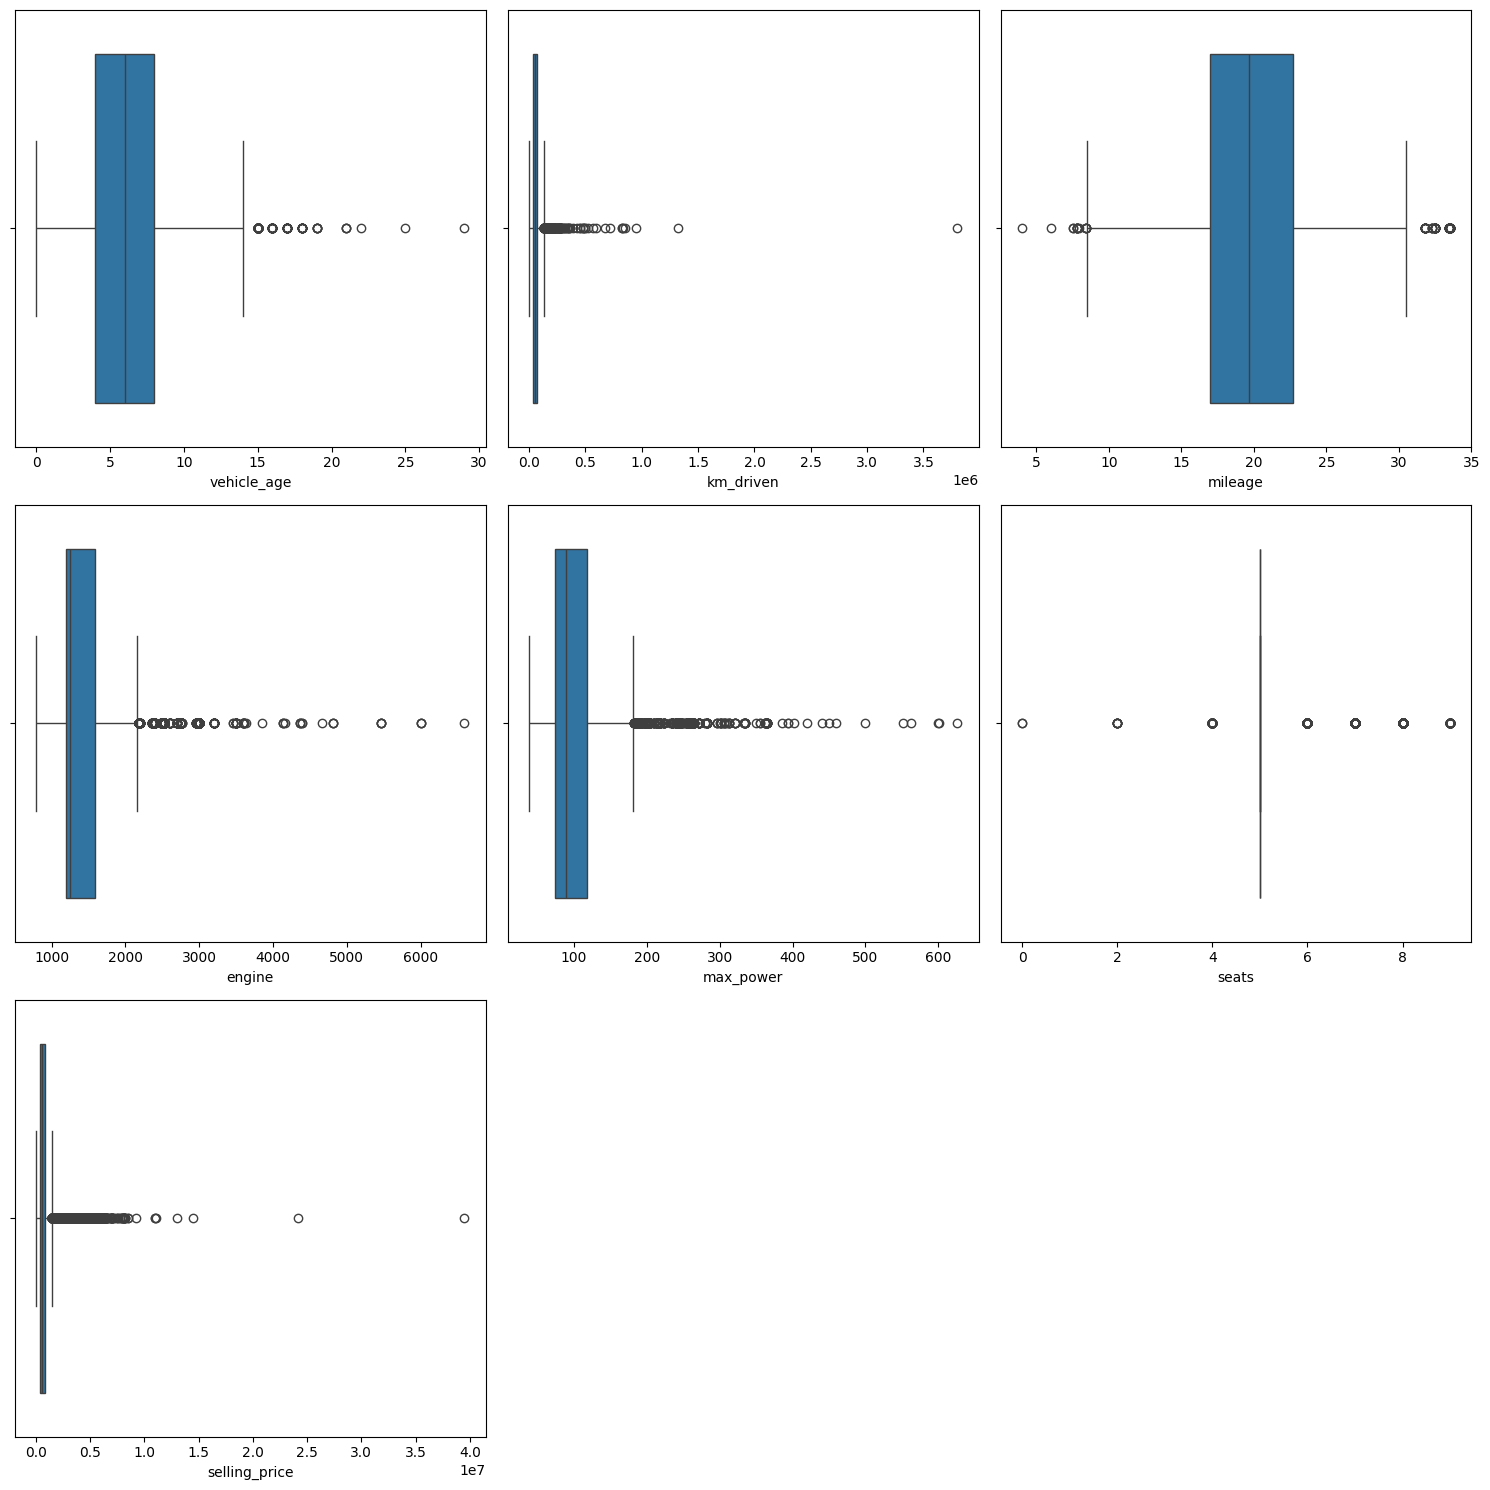

In [17]:
plt.figure(figsize=(15,15))
for i in range(0, len(num_column)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[num_column[i]])
    plt.xlabel(num_column[i])
    plt.tight_layout()

<Axes: >

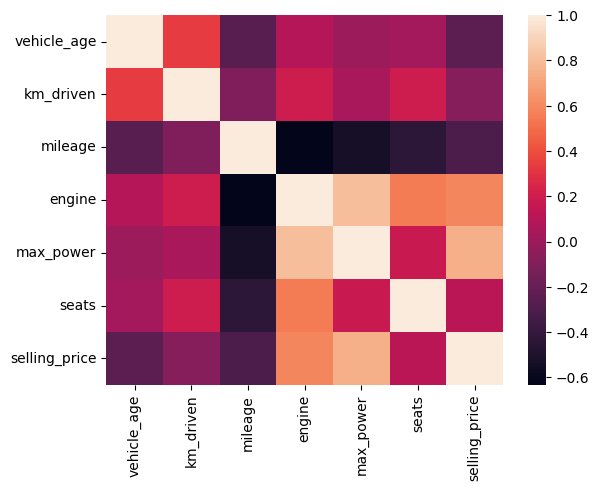

In [18]:
sns.heatmap(df[num_column].corr())

(0.0, 3000000.0)

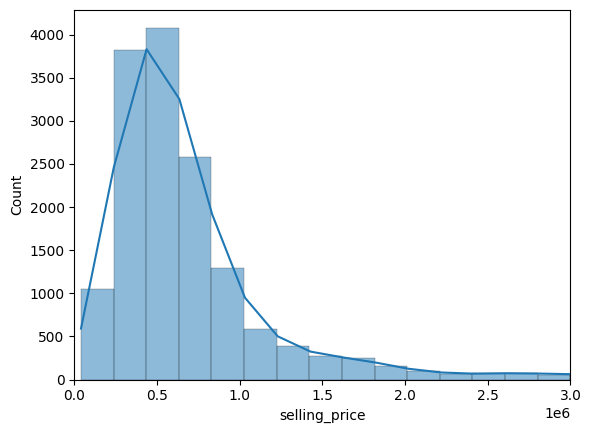

In [19]:
sns.histplot(df['selling_price'],bins=200,kde=True)
plt.xlim(0,3000000)

In [20]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [21]:
df['brand'].value_counts()[:10]

brand
Maruti        4933
Hyundai       2952
Honda         1476
Mahindra       999
Toyota         789
Ford           776
Volkswagen     614
Renault        527
BMW            436
Tata           421
Name: count, dtype: int64

In [22]:
str_column

Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')

In [44]:
lb=LabelEncoder()

for col in str_column:
    df[col]=lb.fit_transform(df[col])


In [25]:
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,65,18,7,9,120000,1,4,1,19.70,796,46.30,5,120000
1,34,8,54,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,40,8,118,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,65,18,7,9,37000,1,4,1,20.92,998,67.10,5,226000
4,20,6,38,6,30000,0,1,1,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,39,8,117,9,10723,0,4,1,19.81,1086,68.05,5,250000
15407,73,18,42,2,18000,0,4,1,17.50,1373,91.10,7,925000
15408,101,27,77,6,67000,0,1,1,21.14,1498,103.52,5,425000
15409,64,17,114,5,3800000,0,1,1,16.00,2179,140.00,7,1225000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15244 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15244 non-null  int64  
 1   brand              15244 non-null  int64  
 2   model              15244 non-null  int64  
 3   vehicle_age        15244 non-null  int64  
 4   km_driven          15244 non-null  int64  
 5   seller_type        15244 non-null  int64  
 6   fuel_type          15244 non-null  int64  
 7   transmission_type  15244 non-null  int64  
 8   mileage            15244 non-null  float64
 9   engine             15244 non-null  int64  
 10  max_power          15244 non-null  float64
 11  seats              15244 non-null  int64  
 12  selling_price      15244 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.6 MB


In [27]:
cols_to_transform=['km_driven','mileage','engine','max_power']
sc=StandardScaler()
for col in cols_to_transform:
    df[col]=sc.fit_transform(df[[col]])


In [29]:
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,65,18,7,9,1.243329,1,4,1,0.000640,-1.326227,-1.265491,5,120000
1,34,8,54,5,-0.688493,1,4,1,-0.191245,-0.555669,-0.433600,5,550000
2,40,8,118,11,0.084236,1,4,1,-0.646971,-0.555669,-0.480205,5,215000
3,65,18,7,9,-0.360084,1,4,1,0.293264,-0.938066,-0.780804,5,226000
4,20,6,38,6,-0.495311,0,1,1,0.736997,0.022729,-0.047016,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,39,8,117,9,-0.867708,0,4,1,0.027024,-0.768966,-0.758667,5,250000
15407,73,18,42,2,-0.727130,0,4,1,-0.527043,-0.217469,-0.221550,7,925000
15408,101,27,77,6,0.219463,0,1,1,0.346032,0.022729,0.067864,5,425000
15409,64,17,114,5,72.334381,0,1,1,-0.886827,1.331332,0.917931,7,1225000


In [30]:
X=df.drop('selling_price',axis=1)
y=df['selling_price']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [32]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'SVR':SVR(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [33]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [34]:
r2s=[]
maes=[]
mses=[]
model_names=[]

for model_name,model in models.items():
    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    mae,rmse,r2_square=evaluate_model(y_test,y_pred)


    model_names.append(model_name)
    r2s.append(r2_square)
    maes.append(mae)
    mses.append(rmse)



In [35]:
results_df = pd.DataFrame({
    'Model': model_names,
    'R^2': r2s,
    'MAE': maes,
    'MSE': mses
})

In [36]:
results_df.sort_values(by='R^2',ascending=False)

,Model,R^2,MAE,MSE
4,RandomForestRegressor,0.843024,102490.273059,308941.355512
1,Ridge,0.675788,253035.908148,443990.763570
0,LinearRegression,0.675769,253052.556065,444003.903334
3,DecisionTreeRegressor,0.236324,137086.716956,681418.270739
2,SVR,-0.083478,394793.780074,811650.828579


In [37]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model=RandomForestRegressor()

random_search_cv=RandomizedSearchCV(estimator=rf_model,param_distributions=param_grid,cv=5,random_state=42,n_jobs=-1,n_iter=100)
random_search_cv.fit(X_train,y_train)

/Users/akashmukherjee/Programming/Practise ML/Cardekho/ml_package/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/akashmukherjee/Programming/Practise ML/Cardekho/ml_package/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
92 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/akashmukherjee/Programming/Practise ML/Cardekho/ml_package/lib/python3.11/site-packages/sklearn/model_select

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [38]:
best_params= random_search_cv.best_params_
best_params

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [39]:
random_search_cv.best_score_

np.float64(0.885238808228301)

In [40]:
random_search_cv.predict(X_test)

array([ 541263.30815095,  354268.29645257,  760862.97520629, ...,
       1701225.47930283,  235574.06906907, 4150833.33333333])

In [41]:
model=RandomForestRegressor(**best_params)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae, rmse, r2_square = evaluate_model(y_test, y_pred)

print(f"MAE: {mae}, RMSE: {rmse}, R^2: {r2_square}")


MAE: 99716.12597405643, RMSE: 226319.14305857662, R^2: 0.9157588810400641


In [42]:
X

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,65,18,7,9,1.243329,1,4,1,0.000640,-1.326227,-1.265491,5
1,34,8,54,5,-0.688493,1,4,1,-0.191245,-0.555669,-0.433600,5
2,40,8,118,11,0.084236,1,4,1,-0.646971,-0.555669,-0.480205,5
3,65,18,7,9,-0.360084,1,4,1,0.293264,-0.938066,-0.780804,5
4,20,6,38,6,-0.495311,0,1,1,0.736997,0.022729,-0.047016,5
...,...,...,...,...,...,...,...,...,...,...,...,...
15406,39,8,117,9,-0.867708,0,4,1,0.027024,-0.768966,-0.758667,5
15407,73,18,42,2,-0.727130,0,4,1,-0.527043,-0.217469,-0.221550,7
15408,101,27,77,6,0.219463,0,1,1,0.346032,0.022729,0.067864,5
15409,64,17,114,5,72.334381,0,1,1,-0.886827,1.331332,0.917931,7


In [43]:
save_path='/Users/akashmukherjee/Programming/Practise ML/Cardekho/models/random_forest.joblib'
joblib.dump(model, save_path)

['/Users/akashmukherjee/Programming/Practise ML/Cardekho/models/random_forest.joblib']